<a href="https://colab.research.google.com/github/Zhang-Siyuan-Ella/Deep_learning/blob/main/1_GasCO2_(CPMF_Jan2025_revised)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.5 MB/s eta 0:00:00


In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.graphics.tsaplots as sgt

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
#load the data
df = pd.read_csv("GasCO2.csv",
                 index_col = 'Time',
                 parse_dates = True)
df.head()
# gas is X. CO2 is Y

<ipython-input-4-2bd777cbda51>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("GasCO2.csv",


,CO2,Gas
Time,,
1,53.8,-0.109
2,53.6,0.000
3,53.5,0.178
4,53.5,0.339
5,53.4,0.373


In [ ]:
df.tail()
#可以看到有多少个

,CO2,Gas
Time,,
292,58.5,0.195
293,58.3,0.131
294,57.8,0.017
295,57.3,-0.182
296,57.0,-0.262


In [ ]:
#根据当前时刻的数据生成过去几期的数据
def lag_arrange(df,name = 'Gas',n_lag = 5):
    # name = 'Gas'
    for i in np.arange(n_lag) + 1:
        # print(i)
        df[name + 'Lag' + str(i)] = df[[name]].shift(i)
    df = df.dropna(how = 'any').reset_index().iloc[:,1:]
    return df


In [ ]:
df1 = lag_arrange(df)
df1

,CO2,Gas,GasLag1,GasLag2,GasLag3,GasLag4,GasLag5
0,53.1,0.441,0.373,0.339,0.178,0.000,-0.109
1,52.7,0.461,0.441,0.373,0.339,0.178,0.000
2,52.4,0.348,0.461,0.441,0.373,0.339,0.178
3,52.2,0.127,0.348,0.461,0.441,0.373,0.339
4,52.0,-0.180,0.127,0.348,0.461,0.441,0.373
...,...,...,...,...,...,...,...
286,58.5,0.195,0.253,0.204,0.034,-0.204,-0.528
287,58.3,0.131,0.195,0.253,0.204,0.034,-0.204
288,57.8,0.017,0.131,0.195,0.253,0.204,0.034
289,57.3,-0.182,0.017,0.131,0.195,0.253,0.204


<Axes: >

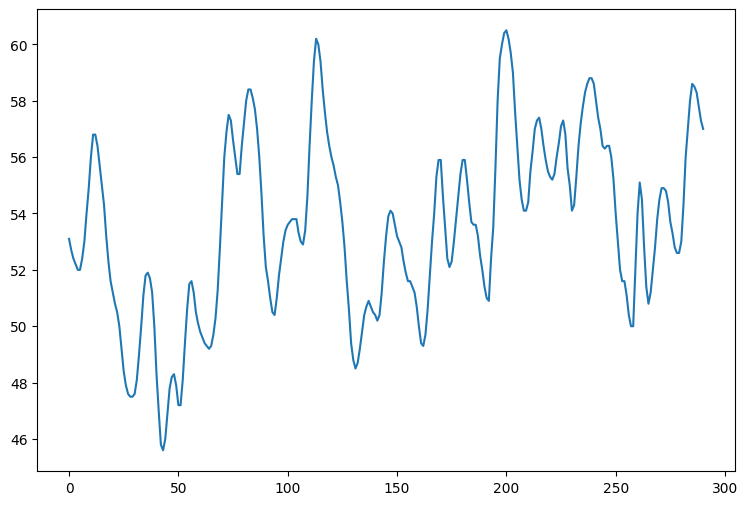

In [ ]:
#Viz
df1.CO2.plot(figsize = (9,6))

In [ ]:
#Stationarity
from statsmodels.tsa.stattools import adfuller
stationarity = adfuller(df1['CO2'])
print('Augmented Dickey Fuller p-value: %F' % stationarity[1])

Augmented Dickey Fuller p-value: 0.070465


In [ ]:
#Training and test set
test = 10
training_set = df1.iloc[:-test, :]
test_set = df1.iloc[-test:, :]
test_set.head(10)

,CO2,Gas,GasLag1,GasLag2,GasLag3,GasLag4,GasLag5
281,54.3,-0.528,-0.740,-0.824,-0.759,-0.493,0.000
282,56.0,-0.204,-0.528,-0.740,-0.824,-0.759,-0.493
283,57.0,0.034,-0.204,-0.528,-0.740,-0.824,-0.759
284,58.0,0.204,0.034,-0.204,-0.528,-0.740,-0.824
285,58.6,0.253,0.204,0.034,-0.204,-0.528,-0.740
286,58.5,0.195,0.253,0.204,0.034,-0.204,-0.528
287,58.3,0.131,0.195,0.253,0.204,0.034,-0.204
288,57.8,0.017,0.131,0.195,0.253,0.204,0.034
289,57.3,-0.182,0.017,0.131,0.195,0.253,0.204
290,57.0,-0.262,-0.182,0.017,0.131,0.195,0.253


In [ ]:
training_set

,CO2,Gas,GasLag1,GasLag2,GasLag3,GasLag4,GasLag5
0,53.1,0.441,0.373,0.339,0.178,0.000,-0.109
1,52.7,0.461,0.441,0.373,0.339,0.178,0.000
2,52.4,0.348,0.461,0.441,0.373,0.339,0.178
3,52.2,0.127,0.348,0.461,0.441,0.373,0.339
4,52.0,-0.180,0.127,0.348,0.461,0.441,0.373
...,...,...,...,...,...,...,...
276,53.3,0.000,0.280,0.251,0.102,-0.033,-0.158
277,52.8,-0.493,0.000,0.280,0.251,0.102,-0.033
278,52.6,-0.759,-0.493,0.000,0.280,0.251,0.102
279,52.6,-0.824,-0.759,-0.493,0.000,0.280,0.251


**ACF and PACF Plots**

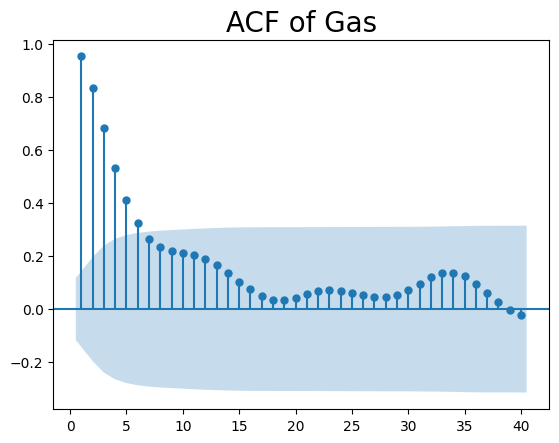

In [ ]:
# ACF
sgt.plot_acf(training_set.Gas, lags=40, alpha=0.05, zero=False)
plt.title("ACF of Gas", size=20)
plt.autoscale(enable=True, axis='y')
plt.show()

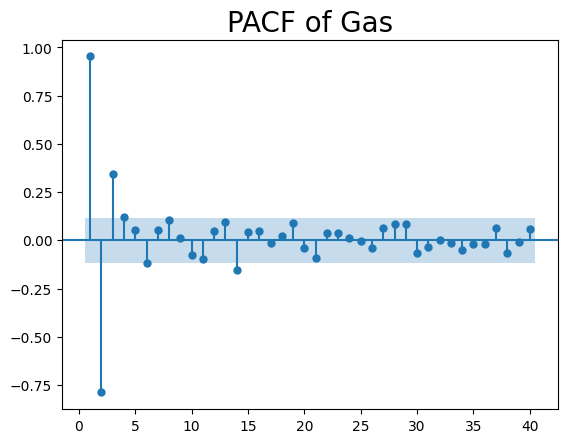

In [ ]:
#PACF
sgt.plot_pacf(training_set.Gas, lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Gas", size = 20)
plt.autoscale(enable=True, axis='y')
plt.show()

#AR(3)

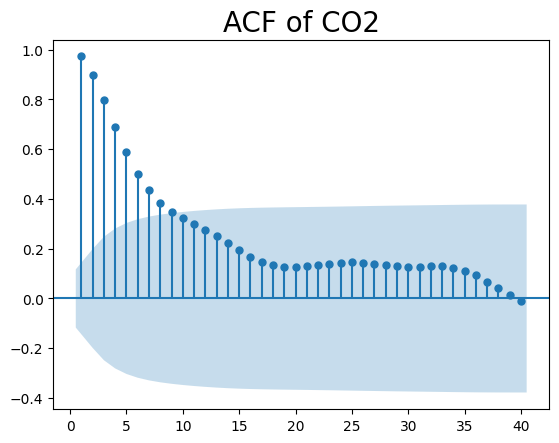

In [ ]:
# ACF
sgt.plot_acf(training_set.CO2, lags=40, alpha=0.05, zero=False)
plt.title("ACF of CO2", size=20)
plt.autoscale(enable=True, axis='y')
plt.show()

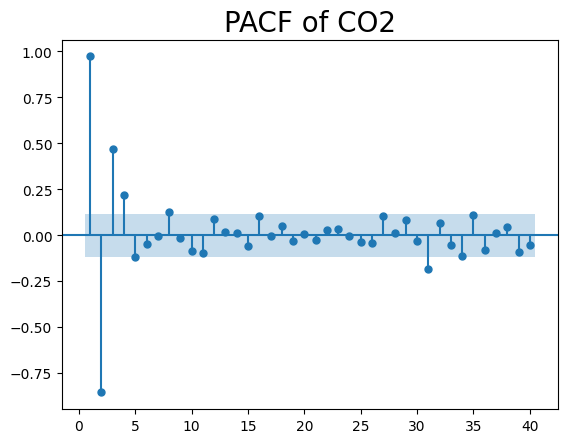

In [ ]:
#PACF
sgt.plot_pacf(training_set.CO2, lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of CO2", size = 20)
plt.autoscale(enable=True, axis='y')
plt.show()

**ARIMA & SARIMA (using Auto Arima)**

In [ ]:
#Exogenous VAriables
#isolate all the X
train_exog = training_set.iloc[:, 1:]
test_exog = test_set.iloc[:, 1:]
print(train_exog)

       Gas  GasLag1  GasLag2  GasLag3  GasLag4  GasLag5
0    0.441    0.373    0.339    0.178    0.000   -0.109
1    0.461    0.441    0.373    0.339    0.178    0.000
2    0.348    0.461    0.441    0.373    0.339    0.178
3    0.127    0.348    0.461    0.441    0.373    0.339
4   -0.180    0.127    0.348    0.461    0.441    0.373
..     ...      ...      ...      ...      ...      ...
276  0.000    0.280    0.251    0.102   -0.033   -0.158
277 -0.493    0.000    0.280    0.251    0.102   -0.033
278 -0.759   -0.493    0.000    0.280    0.251    0.102
279 -0.824   -0.759   -0.493    0.000    0.280    0.251
280 -0.740   -0.824   -0.759   -0.493    0.000    0.280

[281 rows x 6 columns]


In [ ]:
print(test_exog)

       Gas  GasLag1  GasLag2  GasLag3  GasLag4  GasLag5
281 -0.528   -0.740   -0.824   -0.759   -0.493    0.000
282 -0.204   -0.528   -0.740   -0.824   -0.759   -0.493
283  0.034   -0.204   -0.528   -0.740   -0.824   -0.759
284  0.204    0.034   -0.204   -0.528   -0.740   -0.824
285  0.253    0.204    0.034   -0.204   -0.528   -0.740
286  0.195    0.253    0.204    0.034   -0.204   -0.528
287  0.131    0.195    0.253    0.204    0.034   -0.204
288  0.017    0.131    0.195    0.253    0.204    0.034
289 -0.182    0.017    0.131    0.195    0.253    0.204
290 -0.262   -0.182    0.017    0.131    0.195    0.253


3. 为什么 ACF 和 PACF 图对 ARIMA 模型很重要？


选择 AR（自回归）部分的阶数 p：
从 PACF 图中，我们可以看到滞后期的截断点。通常，PACF 在滞后 p 处会有显著的峰值，然后迅速降到零。这可以帮助我们选择 AR 部分的阶数（p）。如果 PACF 在滞后 p 后迅速下降至零，说明 AR 部分的阶数是 p。

选择 MA（滑动平均）部分的阶数 q：
ACF 图提供了滞后期与当前时刻的相关性信息。对于 MA 部分，如果 ACF 在滞后 q 后快速衰减并接近零，说明 MA 部分的阶数是 q。

选择差分阶数 d：
通过观察时间序列的 平稳性，我们可以决定需要进行多少次差分（d）。如果时间序列存在趋势，通常需要进行差分操作，使其平稳。可以通过差分后观察 ACF 和 PACF 图来确认平稳性。


In [ ]:
#ARIMA - take a while to generate results
from pmdarima import auto_arima
model1 = auto_arima(y = training_set.CO2,
                    test='adf', seasonal=True,
                    max_p=3, max_q=3, m=12,
                   stepwise = True)
model1.summary()

#p对应AR，q对应MA
#	SARIMAX(3, 0, 2) p对应3，q对应2
# 0 表示差分阶数为 0。这意味着数据已经是平稳的，不需要进一步的差分操作。如果 I 的值为 1 或更高，则表示需要进行差分（例如，I=1 表示数据需要进行一次差分，以消除趋势）。
# AR(3)：表示时间序列当前的值依赖于前 3 个时刻的值，表现为自回归模型。
# I(0)：表示时间序列已经是平稳的，不需要差分。
# MA(2)：表示时间序列的当前值不仅依赖于前 3 个值，还依赖于过去 2 个时刻的误差项（预测偏差）。



# 再看下面的p值

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  281
Model:               SARIMAX(3, 0, 2)   Log Likelihood                 -89.584
Date:                Tue, 04 Feb 2025   AIC                            193.169
Time:                        03:06:34   BIC                            218.637
Sample:                             0   HQIC                           203.383
                                - 281                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.5917      0.565      2.817      0.005       0.484       2.699
ar.L1          2.1919      0.110     19.915      0.000       1.976       2.408
ar.L2         -1.7404      0.203     -8.559      0.000      -2.139      -1.342
ar.L3          0.5186      0.102      5.108      0.000       0.320       0.718
ma.L1         -0.0917      0.117     -0.786      0.432      -0.320       0.137
ma.L2          0.3070      0.055      5.533      0.000       0.198       0.416
sigma2         0.1082      0.006     16.765      0.000       0.096       0.121
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               119.75
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               2.26   Skew:                             0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Predictions (model1)
predictions = pd.Series(model1.predict(n_periods= test)).rename("ARIMA")
predictions.index = test_set.index
predictions.head(1)

,ARIMA
281,53.492159


<Axes: >

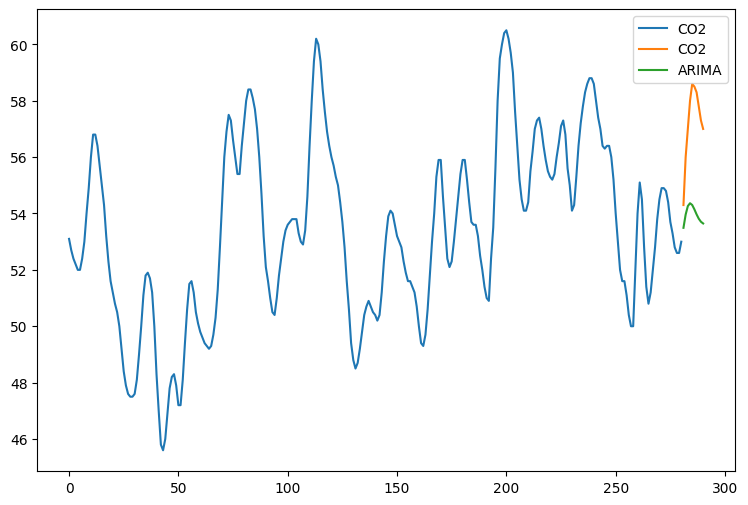

In [ ]:
training_set.CO2.plot(legend = True, figsize = (9,6)) # Plot the entire training set
test_set.CO2.plot(legend = True)
predictions.plot(legend = True)

**ARIMAX (using Auto Arima)**

ARIMA 只利用历史数据中的自回归、差分和误差项来进行预测。

ARIMAX 在 ARIMA 的基础上，允许引入外生变量，以便更好地捕捉可能影响目标时间序列的外部因素。

In [ ]:
#ARIMAX - 5 lags (set max p and q)
from pmdarima import auto_arima
model = auto_arima(y = training_set.CO2, test='adf',
                   X = train_exog, max_p=3, max_q=3, m=12, #m is twelve period
                   seasonal = True,
                   stepwise = True)
model.summary()


# GasLag1 is X
# SARIMAX(1, 0, 1) 的p，q 比ARIMA小，这是一个更好的模型
# AIC和BIC越小越好


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  281
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 -43.891
Date:                Tue, 04 Feb 2025   AIC                            107.783
Time:                        03:18:20   BIC                            144.166
Sample:                             0   HQIC                           122.375
                                - 281                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.8786      1.417      4.150      0.000       3.102       8.655
Gas           -0.0875      0.115     -0.762      0.446      -0.312       0.137
GasLag1        0.0422      0.099      0.426      0.670      -0.152       0.236
GasLag2        0.1148      0.087      1.326      0.185      -0.055       0.284
GasLag3       -0.3937      0.104     -3.797      0.000      -0.597      -0.190
GasLag4       -0.6987      0.089     -7.860      0.000      -0.873      -0.525
GasLag5       -1.2398      0.081    -15.392      0.000      -1.398      -1.082
ar.L1          0.8896      0.026     33.654      0.000       0.838       0.941
ma.L1          0.5179      0.042     12.194      0.000       0.435       0.601
sigma2         0.0801      0.005     14.885      0.000       0.070       0.091
===================================================================================
Ljung-Box (L1) (Q):                   8.18   Jarque-Bera (JB):                64.72
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.85   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Predictions
predictions = pd.Series(model.predict(n_periods= test,
                        X = test_exog)).rename("ARIMAX")
predictions.index = test_set.index
predictions.head(1)

,ARIMAX
281,53.809499


<Axes: >

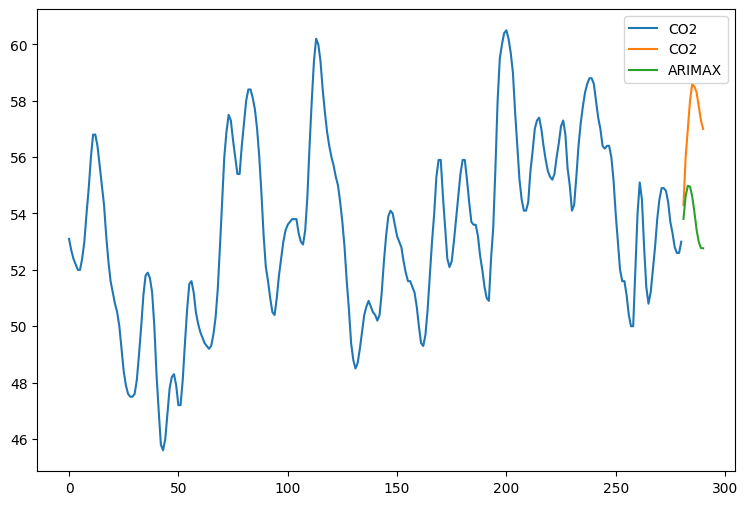

In [ ]:
training_set.CO2.plot(legend = True, figsize = (9,6)) # Plot the entire training set
test_set.CO2.plot(legend = True)
predictions.plot(legend = True)

**ARIMA and SARIMA (Manual Model Specification)**

In [ ]:
# Import the correct ARIMA class
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# ARIMA
model_ar = ARIMA(training_set.CO2, order = (3,0,0)) #only input Y
results_ar = model_ar.fit()
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  281
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 -99.502
Date:                Tue, 04 Feb 2025   AIC                            209.005
Time:                        03:28:42   BIC                            227.196
Sample:                             0   HQIC                           216.300
                                - 281                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.4146      0.786     67.993      0.000      51.875      54.954
ar.L1          2.1970      0.044     49.371      0.000       2.110       2.284
ar.L2         -1.6888      0.079    -21.293      0.000      -1.844      -1.533
ar.L3          0.4640      0.042     11.112      0.000       0.382       0.546
sigma2         0.1163      0.006     17.977      0.000       0.104       0.129
===================================================================================
Ljung-Box (L1) (Q):                   2.59   Jarque-Bera (JB):               188.99
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               2.30   Skew:                             0.85
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# SARIMA - any seasonal trends?
model_ar = ARIMA(training_set.CO2, order = (3,0,2), seasonal_order = (0, 0, 0, 12))
results_ar = model_ar.fit()
results_ar.summary()

# order = (3,0,2) 对应 small PDQ
# seasonal_order = (0, 0, 0, 12) 对应 big PDQ 但是这里没有，所以不用管它，下面那个10个的有

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  281
Model:                 ARIMA(3, 0, 2)   Log Likelihood                 -89.584
Date:                Tue, 04 Feb 2025   AIC                            193.169
Time:                        03:30:18   BIC                            218.637
Sample:                             0   HQIC                           203.383
                                - 281                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.4160      0.854     62.515      0.000      51.741      55.091
ar.L1          2.1925      0.110     19.935      0.000       1.977       2.408
ar.L2         -1.7414      0.203     -8.571      0.000      -2.140      -1.343
ar.L3          0.5191      0.101      5.116      0.000       0.320       0.718
ma.L1         -0.0922      0.117     -0.790      0.429      -0.321       0.136
ma.L2          0.3068      0.056      5.528      0.000       0.198       0.416
sigma2         0.1082      0.006     16.765      0.000       0.096       0.121
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               119.69
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               2.26   Skew:                             0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**ARIMAX (Manual Model Specification)**

In [ ]:
#trainset (how to improve on model?)
model_armax = ARIMA(training_set.CO2, exog = train_exog[['Gas', 'GasLag1', 'GasLag2', 'GasLag3', 'GasLag4', 'GasLag5']], order = (3,0,0)) #order里面的数字可以根据自己尝试调整，不超过（3,0,2）就行
results_armax = model_armax.fit()
results_armax.summary()

#这个模型AIC更小，更好，但是有些gaslag1,2还是不显著
#删掉他们试试


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  281
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 -25.948
Date:                Tue, 04 Feb 2025   AIC                             73.897
Time:                        03:31:56   BIC                            113.919
Sample:                             0   HQIC                            89.948
                                - 281                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.2637      0.275    193.429      0.000      52.724      53.803
Gas           -0.0864      0.104     -0.830      0.406      -0.290       0.118
GasLag1        0.0609      0.082      0.742      0.458      -0.100       0.222
GasLag2        0.0859      0.077      1.114      0.265      -0.065       0.237
GasLag3       -0.4719      0.080     -5.875      0.000      -0.629      -0.314
GasLag4       -0.7196      0.073     -9.794      0.000      -0.864      -0.576
GasLag5       -1.0410      0.073    -14.192      0.000      -1.185      -0.897
ar.L1          1.6500      0.044     37.337      0.000       1.563       1.737
ar.L2         -0.8796      0.070    -12.548      0.000      -1.017      -0.742
ar.L3          0.1624      0.043      3.808      0.000       0.079       0.246
sigma2         0.0696      0.005     14.378      0.000       0.060       0.079
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                84.90
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               3.00   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#trainset (how to improve on model?)
model_armax = ARIMA(training_set.CO2, exog = train_exog[['GasLag3', 'GasLag4', 'GasLag5']], order = (3,0,2))
results_armax = model_armax.fit()
results_armax.summary()

#删掉之后，并且调整了一下order之后 AIC变好
#这里调节了x的滞后项，以及order里面调整的y和episimo的数量

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  281
Model:                 ARIMA(3, 0, 2)   Log Likelihood                 -21.959
Date:                Tue, 04 Feb 2025   AIC                             63.919
Time:                        03:35:41   BIC                            100.302
Sample:                             0   HQIC                            78.510
                                - 281                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.2831      0.300    177.410      0.000      52.694      53.872
GasLag3       -0.5391      0.072     -7.527      0.000      -0.679      -0.399
GasLag4       -0.7081      0.072     -9.852      0.000      -0.849      -0.567
GasLag5       -1.0839      0.068    -15.935      0.000      -1.217      -0.951
ar.L1          2.3190      0.116     20.001      0.000       2.092       2.546
ar.L2         -1.9615      0.169    -11.613      0.000      -2.293      -1.630
ar.L3          0.6230      0.069      9.022      0.000       0.488       0.758
ma.L1         -0.7238      0.123     -5.900      0.000      -0.964      -0.483
ma.L2          0.0560      0.077      0.729      0.466      -0.095       0.207
sigma2         0.0675      0.005     14.236      0.000       0.058       0.077
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                81.12
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               2.89   Skew:                             0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#train dataset (try with different orders!) - try it out!

**Try X= 10 Lags (Gas)**

In [ ]:
def lag_arrange(df,name = 'Gas',n_lag = 10):
    # name = 'Gas'
    for i in np.arange(n_lag) + 1:
        # print(i)
        df[name + 'Lag' + str(i)] = df[[name]].shift(i)
    df = df.dropna(how = 'any').reset_index().iloc[:,1:]
    return df

In [ ]:
df1 = lag_arrange(df)
df1

,CO2,Gas,GasLag1,GasLag2,GasLag3,GasLag4,GasLag5,GasLag6,GasLag7,GasLag8,GasLag9,GasLag10
0,52.0,-0.588,-0.180,0.127,0.348,0.461,0.441,0.373,0.339,0.178,0.000,-0.109
1,52.4,-1.055,-0.588,-0.180,0.127,0.348,0.461,0.441,0.373,0.339,0.178,0.000
2,53.0,-1.421,-1.055,-0.588,-0.180,0.127,0.348,0.461,0.441,0.373,0.339,0.178
3,54.0,-1.520,-1.421,-1.055,-0.588,-0.180,0.127,0.348,0.461,0.441,0.373,0.339
4,54.9,-1.302,-1.520,-1.421,-1.055,-0.588,-0.180,0.127,0.348,0.461,0.441,0.373
...,...,...,...,...,...,...,...,...,...,...,...,...
281,58.5,0.195,0.253,0.204,0.034,-0.204,-0.528,-0.740,-0.824,-0.759,-0.493,0.000
282,58.3,0.131,0.195,0.253,0.204,0.034,-0.204,-0.528,-0.740,-0.824,-0.759,-0.493
283,57.8,0.017,0.131,0.195,0.253,0.204,0.034,-0.204,-0.528,-0.740,-0.824,-0.759
284,57.3,-0.182,0.017,0.131,0.195,0.253,0.204,0.034,-0.204,-0.528,-0.740,-0.824


In [ ]:
#Training and test set
test = 10
training_set = df1.iloc[:-test, :]
test_set = df1.iloc[-test:, :]
test_set.head(10)

,CO2,Gas,GasLag1,GasLag2,GasLag3,GasLag4,GasLag5,GasLag6,GasLag7,GasLag8,GasLag9,GasLag10
276,54.3,-0.528,-0.740,-0.824,-0.759,-0.493,0.000,0.280,0.251,0.102,-0.033,-0.158
277,56.0,-0.204,-0.528,-0.740,-0.824,-0.759,-0.493,0.000,0.280,0.251,0.102,-0.033
278,57.0,0.034,-0.204,-0.528,-0.740,-0.824,-0.759,-0.493,0.000,0.280,0.251,0.102
279,58.0,0.204,0.034,-0.204,-0.528,-0.740,-0.824,-0.759,-0.493,0.000,0.280,0.251
280,58.6,0.253,0.204,0.034,-0.204,-0.528,-0.740,-0.824,-0.759,-0.493,0.000,0.280
281,58.5,0.195,0.253,0.204,0.034,-0.204,-0.528,-0.740,-0.824,-0.759,-0.493,0.000
282,58.3,0.131,0.195,0.253,0.204,0.034,-0.204,-0.528,-0.740,-0.824,-0.759,-0.493
283,57.8,0.017,0.131,0.195,0.253,0.204,0.034,-0.204,-0.528,-0.740,-0.824,-0.759
284,57.3,-0.182,0.017,0.131,0.195,0.253,0.204,0.034,-0.204,-0.528,-0.740,-0.824
285,57.0,-0.262,-0.182,0.017,0.131,0.195,0.253,0.204,0.034,-0.204,-0.528,-0.740


In [ ]:
#Exogenous Variables
train_exog = training_set.iloc[:, 1:]
test_exog = test_set.iloc[:, 1:]
print(train_exog)

       Gas  GasLag1  GasLag2  GasLag3  GasLag4  GasLag5  GasLag6  GasLag7  \
0   -0.588   -0.180    0.127    0.348    0.461    0.441    0.373    0.339   
1   -1.055   -0.588   -0.180    0.127    0.348    0.461    0.441    0.373   
2   -1.421   -1.055   -0.588   -0.180    0.127    0.348    0.461    0.441   
3   -1.520   -1.421   -1.055   -0.588   -0.180    0.127    0.348    0.461   
4   -1.302   -1.520   -1.421   -1.055   -0.588   -0.180    0.127    0.348   
..     ...      ...      ...      ...      ...      ...      ...      ...   
271  0.000    0.280    0.251    0.102   -0.033   -0.158   -0.276   -0.424   
272 -0.493    0.000    0.280    0.251    0.102   -0.033   -0.158   -0.276   
273 -0.759   -0.493    0.000    0.280    0.251    0.102   -0.033   -0.158   
274 -0.824   -0.759   -0.493    0.000    0.280    0.251    0.102   -0.033   
275 -0.740   -0.824   -0.759   -0.493    0.000    0.280    0.251    0.102   

     GasLag8  GasLag9  GasLag10  
0      0.178    0.000    -0.109  
1      

In [ ]:
print(test_exog)

       Gas  GasLag1  GasLag2  GasLag3  GasLag4  GasLag5  GasLag6  GasLag7  \
276 -0.528   -0.740   -0.824   -0.759   -0.493    0.000    0.280    0.251   
277 -0.204   -0.528   -0.740   -0.824   -0.759   -0.493    0.000    0.280   
278  0.034   -0.204   -0.528   -0.740   -0.824   -0.759   -0.493    0.000   
279  0.204    0.034   -0.204   -0.528   -0.740   -0.824   -0.759   -0.493   
280  0.253    0.204    0.034   -0.204   -0.528   -0.740   -0.824   -0.759   
281  0.195    0.253    0.204    0.034   -0.204   -0.528   -0.740   -0.824   
282  0.131    0.195    0.253    0.204    0.034   -0.204   -0.528   -0.740   
283  0.017    0.131    0.195    0.253    0.204    0.034   -0.204   -0.528   
284 -0.182    0.017    0.131    0.195    0.253    0.204    0.034   -0.204   
285 -0.262   -0.182    0.017    0.131    0.195    0.253    0.204    0.034   

     GasLag8  GasLag9  GasLag10  
276    0.102   -0.033    -0.158  
277    0.251    0.102    -0.033  
278    0.280    0.251     0.102  
279    0.000    

非季节性部分 (p, d, q)：


p = 2 (AR)：自回归项的阶数，即模型使用过去 2 个时刻的观测值来预测当前值。

d = 0 (I)：差分阶数，表示数据不需要差分，也就是说，数据已经是平稳的。

q = 0 (MA)：移动平均项的阶数，表示没有移动平均成分，也就是不使用过去的误差项来调整预测。


因此，非季节性部分 SARIMAX(2, 0, 0) 代表了一个包含 2 个自回归项、0 次差分和 0 个移动平均项的模型。
季节性部分 (P, D, Q, s)：


P = 0 (Seasonal AR)：季节性自回归项的阶数，表示没有季节性自回归项。

D = 0 (Seasonal I)：季节性差分的阶数，表示没有季节性差分。

Q = 1 (Seasonal MA)：季节性移动平均项的阶数，表示模型使用过去 1 个季节性误差项来调整预测。

s = 12 (Seasonal Period)：季节性周期，表示数据的季节性周期为 12，通常代表一年中 12 个月的季节性模式。

In [ ]:
#ARIMAX using Auto arima - 10 lags (try it out)
from pmdarima import auto_arima
model = auto_arima(y = training_set.CO2, test='adf',
                   X = train_exog, max_p=3, max_q=3, m=12, #m is twelve period
                   seasonal = True,
                   stepwise = True)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  276
Model:             SARIMAX(2, 0, 0)x(0, 0, [1], 12)   Log Likelihood                  13.554
Date:                              Tue, 04 Feb 2025   AIC                              4.892
Time:                                      03:48:30   BIC                             62.818
Sample:                                           0   HQIC                            28.137
                                              - 276                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.4776      1.194      2.913      0.004       1.138       5.818
Gas           -0.0409      0.097     -0.421      0.674      -0.231       0.149
GasLag1        0.0677      0.077      0.880      0.379      -0.083       0.218
GasLag2       -0.0611      0.067     -0.915      0.360      -0.192       0.070
GasLag3       -0.5470      0.077     -7.136      0.000      -0.697      -0.397
GasLag4       -0.6497      0.072     -9.052      0.000      -0.790      -0.509
GasLag5       -0.8071      0.075    -10.692      0.000      -0.955      -0.659
GasLag6       -0.5193      0.082     -6.362      0.000      -0.679      -0.359
GasLag7       -0.2950      0.096     -3.070      0.002      -0.483      -0.107
GasLag8       -0.0489      0.098     -0.501      0.617      -0.241       0.143
GasLag9        0.0245      0.101      0.243      0.808      -0.173       0.222
GasLag10      -0.1416      0.088     -1.617      0.106      -0.313       0.030
ar.L1          1.4612      0.042     34.562      0.000       1.378       1.544
ar.L2         -0.5265      0.043    -12.266      0.000      -0.611      -0.442
ma.S.L12       0.1851      0.082      2.244      0.025       0.023       0.347
sigma2         0.0525      0.004     13.142      0.000       0.045       0.060
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):               416.11
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               3.68   Skew:                             0.70
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#ARIMAX using manual model specification - 10 lags (try it out)
model_armax = ARIMA(training_set.CO2, exog = train_exog[['Gas', 'GasLag1', 'GasLag2', 'GasLag3', 'GasLag4', 'GasLag5', 'GasLag6', 'GasLag7', 'GasLag8', 'GasLag9','GasLag10']], order = (2,0,0)) #order里面的数字可以根据自己尝试调整，不超过（3,0,2）就行
results_armax = model_armax.fit()
results_armax.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  276
Model:                 ARIMA(2, 0, 0)   Log Likelihood                  27.663
Date:                Tue, 04 Feb 2025   AIC                            -25.325
Time:                        03:54:24   BIC                             28.981
Sample:                             0   HQIC                            -3.533
                                - 276                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.2164      0.082    652.597      0.000      53.057      53.376
Gas           -0.0814      0.096     -0.851      0.395      -0.269       0.106
GasLag1        0.0564      0.082      0.686      0.493      -0.105       0.218
GasLag2       -0.0574      0.073     -0.782      0.434      -0.201       0.086
GasLag3       -0.5512      0.087     -6.328      0.000      -0.722      -0.380
GasLag4       -0.6444      0.083     -7.752      0.000      -0.807      -0.482
GasLag5       -0.8408      0.078    -10.748      0.000      -0.994      -0.688
GasLag6       -0.5235      0.090     -5.831      0.000      -0.699      -0.348
GasLag7       -0.3298      0.105     -3.154      0.002      -0.535      -0.125
GasLag8       -0.0561      0.124     -0.451      0.652      -0.300       0.188
GasLag9       -0.0008      0.122     -0.007      0.995      -0.239       0.238
GasLag10      -0.1669      0.088     -1.887      0.059      -0.340       0.006
ar.L1          1.3985      0.040     34.844      0.000       1.320       1.477
ar.L2         -0.6106      0.045    -13.593      0.000      -0.699      -0.523
sigma2         0.0475      0.003     14.023      0.000       0.041       0.054
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               681.80
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               3.40   Skew:                             1.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_armax = ARIMA(training_set.CO2, exog = train_exog[['GasLag3', 'GasLag4', 'GasLag5', 'GasLag6', 'GasLag7']], order = (2,0,0)) #order里面的数字可以根据自己尝试调整，不超过（3,0,2）就行
results_armax = model_armax.fit()
results_armax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  276
Model:                 ARIMA(2, 0, 0)   Log Likelihood                  21.281
Date:                Tue, 04 Feb 2025   AIC                            -24.562
Time:                        03:55:40   BIC                              8.022
Sample:                             0   HQIC                           -11.486
                                - 276                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.2230      0.082    648.798      0.000      53.062      53.384
GasLag3       -0.6110      0.060    -10.141      0.000      -0.729      -0.493
GasLag4       -0.6539      0.078     -8.356      0.000      -0.807      -0.500
GasLag5       -0.8677      0.070    -12.326      0.000      -1.006      -0.730
GasLag6       -0.5239      0.080     -6.577      0.000      -0.680      -0.368
GasLag7       -0.4219      0.072     -5.863      0.000      -0.563      -0.281
ar.L1          1.4294      0.038     37.761      0.000       1.355       1.504
ar.L2         -0.6285      0.044    -14.230      0.000      -0.715      -0.542
sigma2         0.0497      0.003     16.150      0.000       0.044       0.056
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               483.40
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.89   Skew:                             1.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""